In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import repaint_sampling as RS
import repaint_patcher as RP
import prepare_glide_inpaint as PGI
from image_util import *

In [9]:
import torch as th
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder, DatasetFolder
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import json
import os

size = 64
large_size = 256

common_transform = transforms.Compose([
    transforms.Resize(large_size),
    transforms.CenterCrop(large_size),
    transforms.Resize((size, size)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 2 - 1),
])
with open('data/datasets/imagenet.json') as f:
    imagenet_labels = json.load(f)

def imagenet_target_transform(target):
    return imagenet_labels[int(datasets['imagenet_val'].classes[target])]



class CocoFolder(Dataset):
    def __init__(self, root, annotations_json, transform=None, target_transform=None):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform

        with open(annotations_json) as f:
            coco_json = json.load(f)

        annotations_by_id = {_ann['image_id']: _ann for _ann in coco_json['annotations']}
        coco_filename_to_annotations = {_img['file_name']: annotations_by_id[_img['id']]['caption'] for _img in coco_json['images']}
        self.classes = list(set(coco_filename_to_annotations.keys()))
        self.classes.sort()

        all_files = os.listdir(root)
        all_images = [f for f in all_files if f.endswith('.jpg')]
        self.image_paths = [os.path.basename(f) for f in all_images]
        self.targets = [coco_filename_to_annotations[os.path.basename(f)] for f in all_images]
        self.image_paths = [os.path.join(root, f) for f in self.image_paths]
        self.samples = list(zip(self.image_paths, self.targets))
    
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, target = self.samples[idx]
        img = Image.open(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target

datasets = {
    'imagenet_val': ImageFolder('data/datasets/ILSVRC2012_img_val_subset', transform=common_transform, target_transform=imagenet_target_transform),
    'coco_val2017': CocoFolder('data/datasets/val2017', 'data/annotations/captions_val2017.json', transform=common_transform),
    'places_365_train': ImageFolder('data/datasets/places365_standard/train', transform=common_transform, target_transform=lambda x: p365t_classes[x].replace("_", " ")),
    'places_365_val': ImageFolder('data/datasets/places365_standard/val', transform=common_transform,  target_transform=lambda x: p365v_classes[x].replace("_", " ")),
}

p365t_classes = datasets['places_365_train'].classes
p365v_classes = datasets['places_365_val'].classes

masks = {
    'ex64': read_mask('data/masks/64/ex64.png', size=64),
    'genhalf': read_mask('data/masks/64/genhalf.png',size=64),
    'sr64': read_mask('data/masks/64/sr64.png',size=64),
    'thick': read_mask('data/masks/64/thick.png',size=64),
    'thin': read_mask('data/masks/64/thin.png',size=64),
    'vs64': read_mask('data/masks/64/vs64.png',size=64),
}

In [26]:
dataloaders = {name: DataLoader(dataset, batch_size=4, shuffle=True, drop_last=True) for name, dataset in datasets.items()}

Processing ex64
Processing imagenet_val
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.64it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 25.06it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.87it/s]

('bullfrog, Rana catesbeiana', 'maraca', 'Model T', 'English setter')


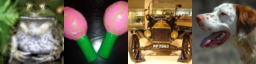

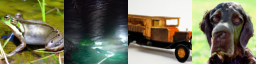

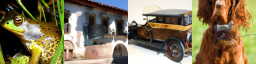

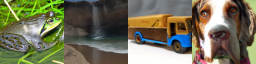

Processed 4 images
Processing coco_val2017
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.61it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.98it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.94it/s]

('The remains of a piece of white cake sits on a red plate.', 'A colorful square shaped pizza in an oven.', 'A man in shorts and a long sleeve shirt playing tennis.', 'A man smiling while standing in front of a woman with a piece of cake. ')


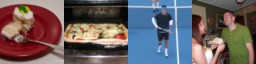

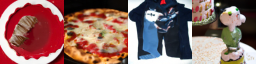

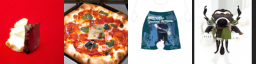

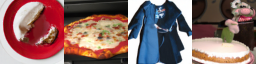

Processed 4 images
Processing places_365_train
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.64it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.97it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.98it/s]

('escalator-indoor', 'hot spring', 'bridge', 'soccer field')


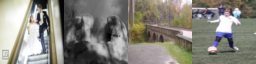

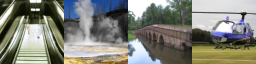

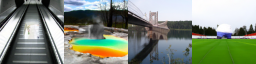

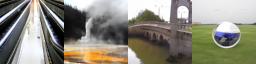

Processed 4 images
Processing places_365_val
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.74it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 25.10it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 25.01it/s]

('pond', 'airport terminal', 'construction site', 'basement')


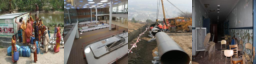

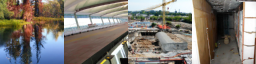

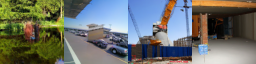

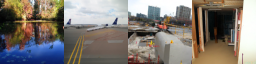

Processed 4 images
Processing genhalf
Processing imagenet_val
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.71it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 25.08it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.99it/s]

('silky terrier, Sydney silky', 'swab, swob, mop', 'necklace', 'Walker hound, Walker foxhound')


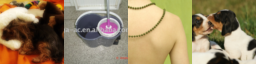

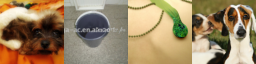

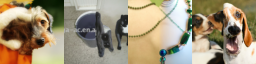

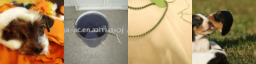

Processed 4 images
Processing coco_val2017
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.69it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 25.04it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

100%|██████████| 612/612 [00:24<00:00, 24.84it/s]

('a couple skiers going down the snowy hill', 'Elderly women debark a bus at a station. ', 'A table topped with apples, oranges and bananas.', 'A PERSON HOLDING A BLACKBERRY CELL PHONE IN THEIR HAND ')


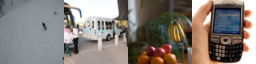

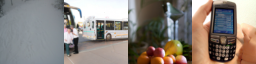

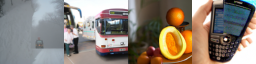

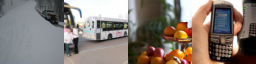

Processed 4 images
Processing places_365_train
CFGSampler


100%|██████████| 250/250 [00:14<00:00, 17.76it/s]


CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

 16%|█▋        | 100/612 [00:05<00:28, 17.67it/s]


KeyboardInterrupt: 

In [27]:
cap = 640
guidance_scale = 7.0

has_cuda = th.cuda.is_available()
device = th.device('cpu' if not has_cuda else 'cuda:0')

model, diffusion, options = PGI.create_glide_generative(device=device, cuda=has_cuda, timesteps='250')
model_nip, diffusion_nip, options_nip = PGI.create_glide_generative(device=device, cuda=has_cuda, timesteps='250', use_inpaint=False)


from copy import deepcopy

diffusion_rp = deepcopy(diffusion)
diffusion_rp_nip = deepcopy(diffusion_nip)

RP.patch_model_for_repaint(diffusion_rp)
RP.patch_model_for_repaint(diffusion_rp_nip)

base_sampler = RS.CFGSamplerInpaint(model, diffusion, options, guidance_scale, device=device)
base_sampler_rp = RS.CFGSamplerRepaint(model_nip, diffusion_rp_nip, options_nip, guidance_scale, device=device)
base_sampler_rpip = RS.CFGSamplerRepaintInpaint(model, diffusion_rp, options, guidance_scale, device=device)


jump_params = {
    "t_T": 250,
    "n_sample": 1,
    "jump_length": 10,
    "jump_n_sample": 5,
    "start_resampling": 20
}

jump_params_rp_nip = {
    "t_T": 250,
    "n_sample": 1,
    "jump_length": 10,
    "jump_n_sample": 5,
    "start_resampling": 110,
    "end_resampling": 40
}

for mask_name, mask in masks.items():
    print(f"Processing {mask_name}")
    for dataloader in dataloaders.items():
        name, dataloader = dataloader
        print(f"Processing {name}") 
        processed = 0
        batch_size = dataloader.batch_size
        batch_num = 0
        for source_image_64, prompts in dataloader:
            save_path_base = f"data/samples/{name}/{mask_name}/base/{batch_num}/"
            save_path_rp = f"data/samples/{name}/{mask_name}/repaint/{batch_num}/"
            save_path_rpip = f"data/samples/{name}/{mask_name}/rpip/{batch_num}/"
            save_path_original = f"data/samples/{name}/{mask_name}/original/{batch_num}/"
            os.makedirs(save_path_base, exist_ok=True)
            os.makedirs(save_path_rp, exist_ok=True)
            os.makedirs(save_path_rpip, exist_ok=True)
            os.makedirs(save_path_original, exist_ok=True)

            samples_glide = base_sampler.sample(source_image_64, mask, prompts, batch_size, batch_prompts=True)
            samples_glide = samples_glide[:batch_size]
            samples_repaint = base_sampler_rp.sample(source_image_64, mask, prompts, batch_size, jump_params=jump_params_rp_nip, batch_prompts=True)
            samples_repaint = samples_repaint[:batch_size]
            samples_rpip = base_sampler_rpip.sample(source_image_64, mask, prompts, batch_size, jump_params=jump_params, batch_prompts=True)
            samples_rpip = samples_rpip[:batch_size]

            # save_batch(source_image_64, save_path_original + '{1}_{0}.png', prompts)
            # save_batch(samples_glide, save_path_base + '{1}_{0}.png', prompts)
            # save_batch(samples_repaint, save_path_rp + '{1}_{0}.png', prompts)
            # save_batch(samples_rpip, save_path_rpip + '{1}_{0}.png', prompts)

            batch_num += 1
            processed += batch_size
            print(prompts)
            show_images(source_image_64)
            show_images(samples_glide)
            show_images(samples_repaint)
            show_images(samples_rpip)
            break
            if processed > cap:
                break
        print(f"Processed {processed} images")

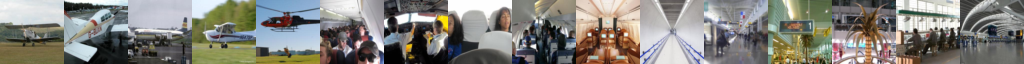

In [ ]:
for batch in dataloaders['places_365_val']:
    # print(batch[0].shape, batch[1])
    show_images(batch[0])
    # for i, img in enumerate(batch[0]):
    #     show_images((img*masks['thing'].squeeze(0)).unsqueeze(0))
    #     print(i)
    break

torch.Size([3, 64, 64])

'Lhasa, Lhasa apso'

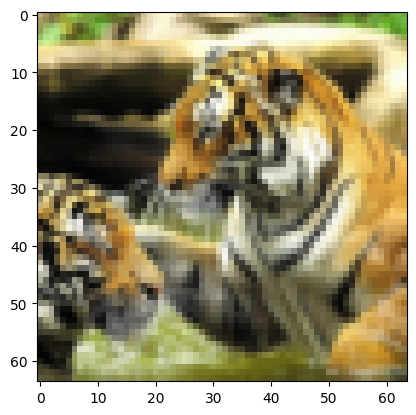

In [ ]:
display(datasets['imagenet_val'][1024][0].shape)
display(datasets['imagenet_val'][1024][1])
plt.imshow((datasets['imagenet_val'][1024][0].permute(1, 2, 0) + 1) / 2)

In [ ]:
has_cuda = th.cuda.is_available()
device = th.device('cpu' if not has_cuda else 'cuda:2')

In [ ]:
model, diffusion, options = PGI.create_glide_generative(device=device, cuda=has_cuda, timesteps='250')
model_up, diffusion_up, options_up = PGI.create_glide_upsampler(device=device, cuda=has_cuda, timesteps='250')

/home/infres/kbrowder-24/jp/CSC_52002_EP_Generative_AI_Project/glide-text2im-main/glide_text2im/download.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return th.load(

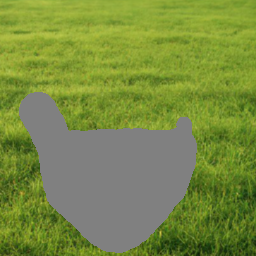

In [ ]:
# Sampling parameters
# ten different colored monkey prompts
prompts = ["a pink monkey in a field", "a blue monkey in a field", "a green monkey in a field", "a yellow monkey in a field", "a purple monkey in a field", "a red monkey in a field", "a cyan monkey in a field", "a magenta monkey in a field", "a orange monkey in a field", "a brown monkey in a field"]
batch_size = 10
guidance_scale = 5.0

# Tune this parameter to control the sharpness of 256x256 images.
# A value of 1.0 is sharper, but sometimes results in grainy artifacts.
upsample_temp = 0.997

# src_img_path = 'RePaint-main/data/datasets/gts/face/000000.png'
src_img_path = 'glide-text2im-main/notebooks/grass.png'

# Source image we are inpainting
source_image_256 = read_image(src_img_path, size=256)
source_image_64 = read_image(src_img_path, size=64)

src_mask_path = 'RePaint-main/data/datasets/gt_keep_masks/face/000000.png'

# The mask should always be a boolean 64x64 mask, and then we
# can upsample it for the second stage.
source_mask_64 = read_mask(src_mask_path, size=64)
source_mask_256 = read_mask(src_mask_path, size=256)

# Visualize the image we are inpainting
show_images(source_image_256 * source_mask_256)

# Starting With Glide Inpainting

In [ ]:
for batch in dataloaders['places_365_val']:
    source_image_64, prompts = batch
    prompts = list(prompts)
    break

batch_size = dataloaders['places_365_val'].batch_size

In [ ]:
source_mask_64 = masks['genhalf']

In [ ]:
base_sampler = RS.CFGSamplerInpaint(model, diffusion, options, guidance_scale, device=device)
samples = base_sampler.sample(source_image_64, source_mask_64, prompts, batch_size, batch_prompts=True)
samples = samples[:batch_size]

CFGSampler


100%|██████████| 250/250 [00:40<00:00,  6.18it/s]


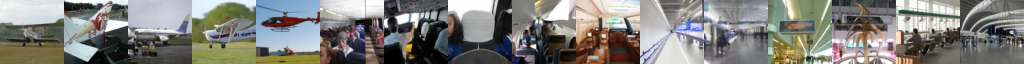

In [ ]:
show_images(samples)

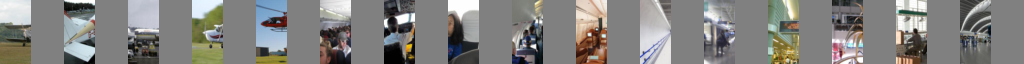

In [ ]:
show_images(source_image_64 * source_mask_64.repeat(batch_size, 1, 1, 1))

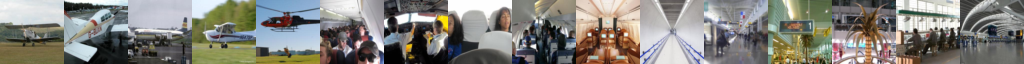

In [ ]:
show_images(source_image_64)

In [ ]:
upscale_sampler = RS.UpscaleSamplerInpaint(model_up, diffusion_up, options_up, model_fn=None, device=device)
upsamples = upscale_sampler.sample(samples, upsample_temp, source_image_256, source_mask_256, prompts, batch_size, batch_prompts=True)
upsamples = upsamples[:batch_size]

Batch prompts


  1%|          | 3/250 [00:00<01:02,  3.95it/s]

100%|██████████| 250/250 [00:59<00:00,  4.17it/s]


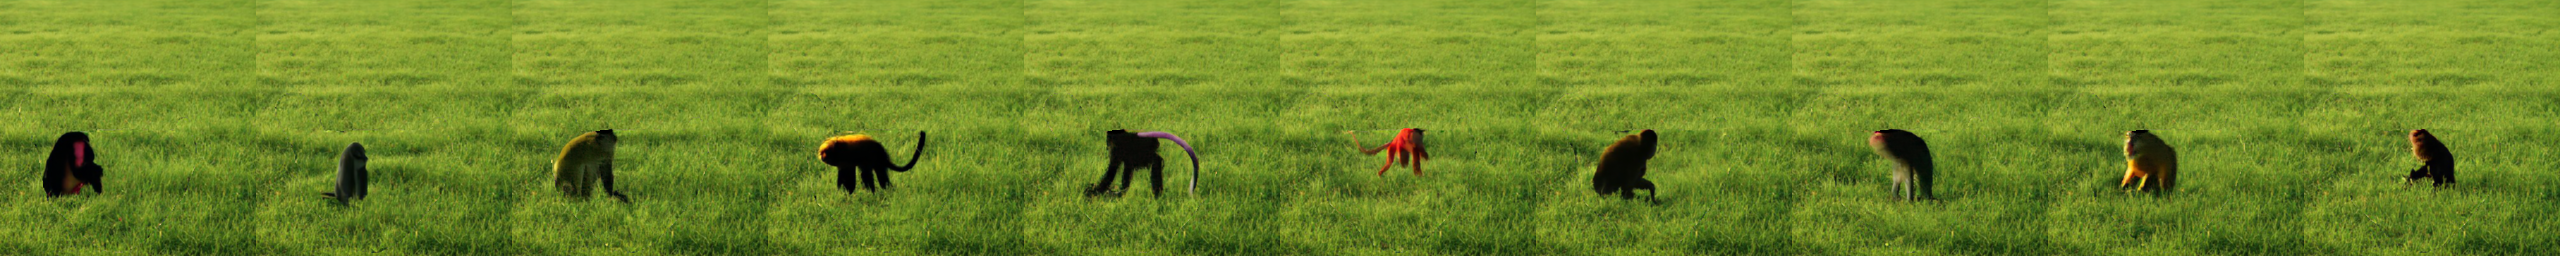

In [ ]:
show_images(upsamples)

# Now With Repaint

In [ ]:
from copy import deepcopy

diffusion_rp = deepcopy(diffusion)
diffusion_rp_up = deepcopy(diffusion_up)

RP.patch_model_for_repaint(diffusion_rp)
RP.patch_model_for_repaint(diffusion_rp_up)

jump_params = {
    "t_T": 250,
    "n_sample": 1,
    "jump_length": 10,
    "jump_n_sample": 5,
    "start_resampling": 20
}

In [ ]:
base_sampler = RS.CFGSamplerRepaint(model, diffusion_rp, options, guidance_scale, device=device)
samples = base_sampler.sample(source_image_64, source_mask_64, prompts, batch_size, jump_params=jump_params, batch_prompts=True)
samples = samples[:batch_size]

CFGSampler
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,

  0%|          | 0/612 [00:00<?, ?it/s]

  1%|▏         | 9/612 [00:01<01:52,  5.35it/s]


KeyboardInterrupt: 

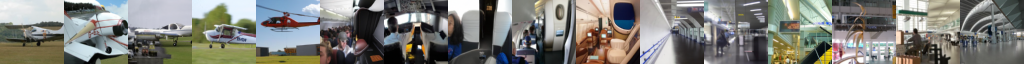

In [ ]:
show_images(samples)

In [ ]:
upscale_sampler = RS.UpscaleSamplerRepaint(model_up, diffusion_rp_up, options_up, model_fn=None, device=device)
upsamples = upscale_sampler.sample(samples, upsample_temp, source_image_256, source_mask_256, prompts, batch_size, jump_params=jump_params, batch_prompts=True)
upsamples = upsamples[:batch_size]

Batch prompts
times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 

  0%|          | 0/452 [00:00<?, ?it/s]

100%|██████████| 452/452 [01:25<00:00,  5.32it/s]


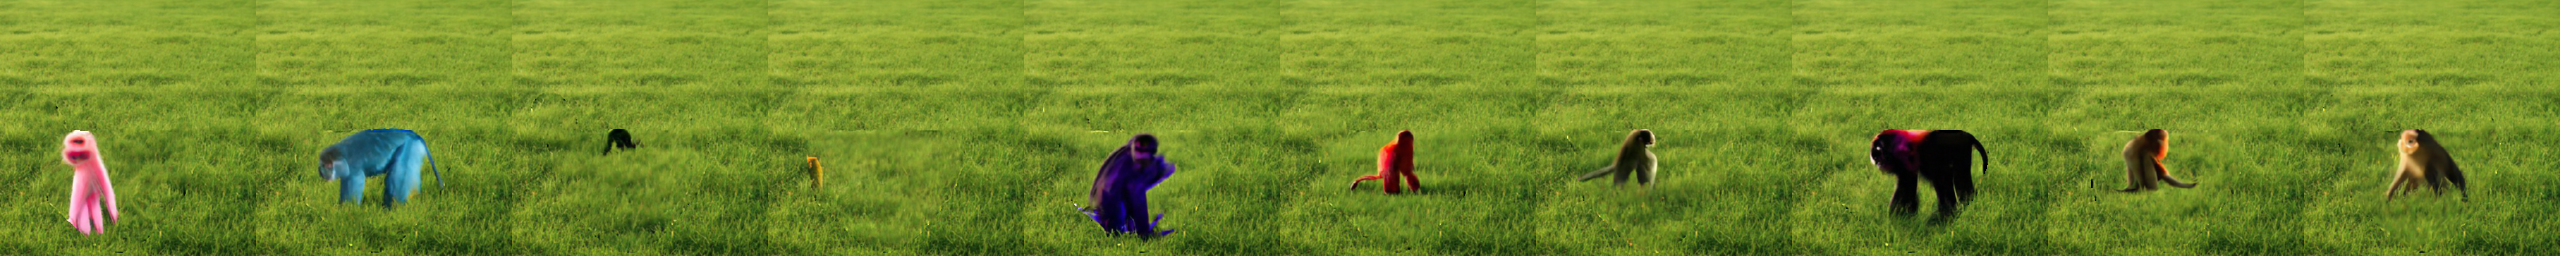

In [ ]:
show_images(upsamples)

# Now With Both Repaint and Inpainting

In [ ]:
base_sampler = RS.CFGSamplerRepaintInpaint(model, diffusion_rp, options, guidance_scale, device=device)
samples = base_sampler.sample(source_image_64, source_mask_64, prompts[0], batch_size, jump_params=jump_params)
samples = samples[:batch_size]

times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39

  3%|▎         | 13/452 [00:01<00:48,  9.11it/s]

100%|██████████| 452/452 [00:38<00:00, 11.71it/s]


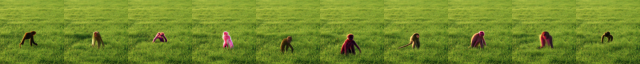

In [ ]:
show_images(samples)

In [ ]:
upscale_sampler = RS.UpscaleSamplerRepaintInpaint(model_up, diffusion_rp_up, options_up, model_fn=None, device=device)
upsamples = upscale_sampler.sample(samples, upsample_temp, source_image_256, source_mask_256, prompts[0], batch_size, jump_params=jump_params)
upsamples = upsamples[:batch_size]

times: [249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39

  0%|          | 0/452 [00:00<?, ?it/s]

100%|██████████| 452/452 [01:25<00:00,  5.30it/s]


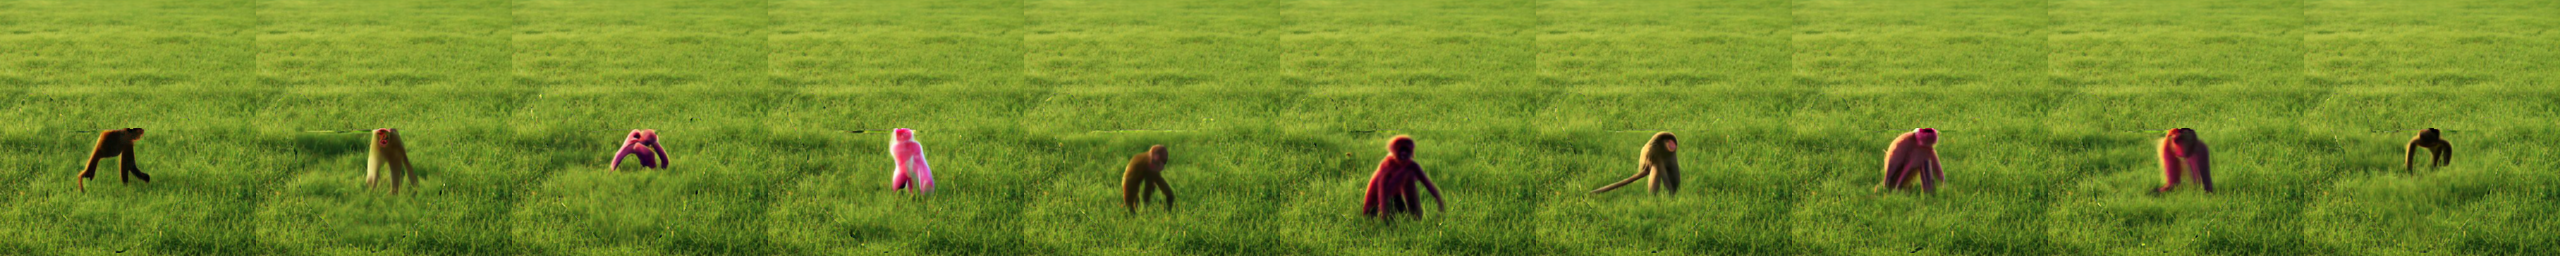

In [ ]:
show_images(upsamples)